In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('phishing.txt',header=None,names=[ 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport', 'class' ])

In [8]:
data

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [9]:
x = data.drop('class',axis=1)
y = data['class']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.3)

In [14]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=100.0)

In [15]:
lr_model.fit(x_train,y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = lr_model.predict(x_test)

In [17]:
import sklearn.metrics as mt

In [18]:
mt.accuracy_score(y_test,y_pred)

0.9219173952366596

In [20]:
tn, fp, fn, tp = mt.confusion_matrix(y_test,y_pred).ravel()

In [21]:
tn, fp, fn, tp

(1298, 130, 129, 1760)

In [23]:
print(mt.classification_report(y_test,y_pred))

precision    recall  f1-score   support

          -1       0.91      0.91      0.91      1428
           1       0.93      0.93      0.93      1889

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



In [31]:
simplified_data = data[['PrefixSuffix-','AnchorURL','class']]
simplified_data.head()

,PrefixSuffix-,AnchorURL,class
0,-1,-1,-1
1,-1,0,-1
2,-1,0,-1
3,-1,0,-1
4,-1,0,1


In [32]:
x = data[['PrefixSuffix-','AnchorURL']]
y = data[['class']]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.3)

In [37]:
lr_model.fit(x_train,y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = lr_model.predict(x_test)

In [39]:
mt.accuracy_score(y_test,y_pred)

0.8546879710581851

In [41]:
tn, fp, fn, tp = mt.confusion_matrix(y_test,y_pred).ravel()


In [42]:
tn, fp, fn, tp


(953, 475, 7, 1882)

In [45]:
import seaborn as sns
sns.set()

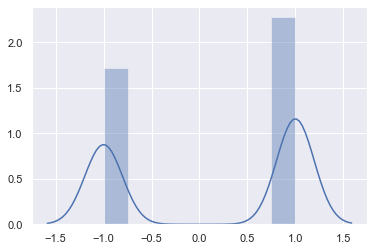

In [65]:
sns.distplot(y_test.values.reshape(-1))

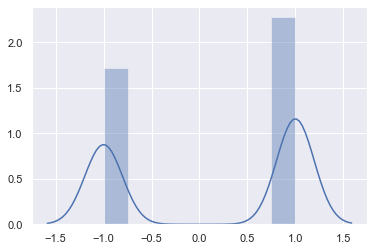

In [66]:
sns.distplot(y_test)